In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [79]:
# Read the dataset
df = pd.read_csv('../dataset/postings.csv')

In [80]:
import re

# Sort only tech companies

# Define a list of programming languages, removing "Go" and ensuring accurate matches
programming_languages = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",
]

# Define additional tech-related keywords
tech_keywords = [
    "data science", "data analytics", 'machine learning', 'deep learning', 'artificial intelligence', "frontend", 'backend', 'git', 'api', 'apis', 'json', 'sdk', 'developer'
]

# Combine programming languages and tech-related keywords
combined_keywords = programming_languages + tech_keywords

# Convert the combined list into a regex pattern ensuring whole-word matches
pattern = r"\b(?:{})\b".format("|".join(combined_keywords))

# Count matches in title and description
df["match_count"] = df["title"].str.count(pattern, flags=re.IGNORECASE).fillna(0) + \
                    df["description"].str.count(pattern, flags=re.IGNORECASE).fillna(0)

# Filter jobs that match at least 2 of the combined keywords
tech_postings = df[df["match_count"] >= 2].drop(columns=["match_count"])

tech_postings.head(20)

KeyboardInterrupt: 

In [ ]:
tech_postings.to_csv('tech_postings.csv', index=False)
print(tech_postings.shape)

(15362, 31)


/var/folders/m7/kgr74ggx1rb3wd3t16w6wdm80000gn/T/ipykernel_26684/1783169596.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings Count", y="Skill", data=top_20_skills_df, palette="viridis")


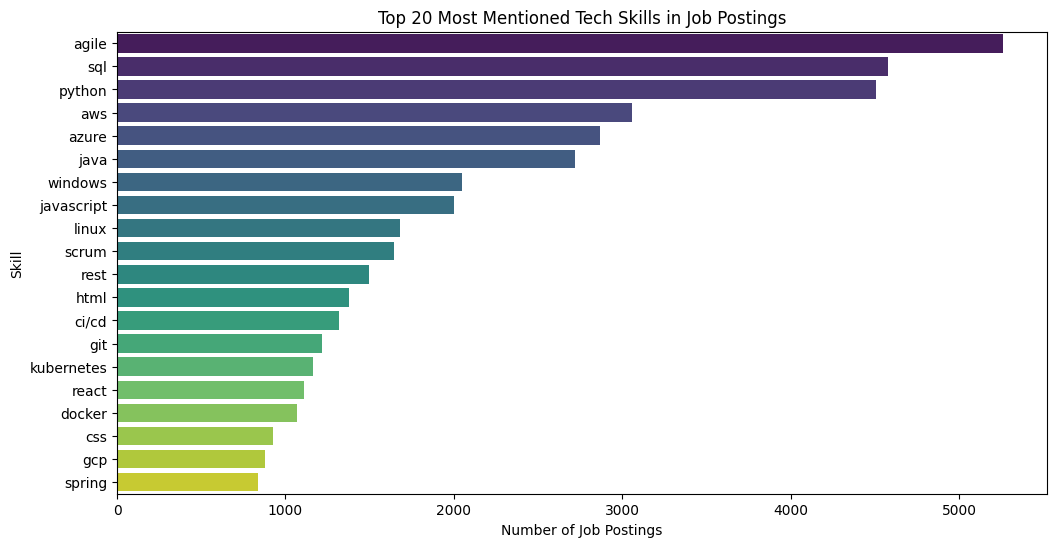

In [ ]:
# Define tech keywords list
tech_skills_keywords = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",
]

# Precompile patterns for all skills in one regex (optimized for efficiency)
pattern = re.compile(r"\b(" + "|".join(map(re.escape, tech_skills_keywords)) + r")\b", re.IGNORECASE)

# Count how many job descriptions contain each skill
skill_counts = {skill.lower(): 0 for skill in tech_skills_keywords}

for description in tech_postings["description"].dropna():
    matches = pattern.findall(description)  # Find all matches at once
    for match in set(matches):  # Count each skill only once per description
        skill_counts[match.lower()] += 1  # Convert match to lowercase to avoid duplication issues

# Convert skill counts to a DataFrame
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Job Postings Count"])


# Sort and select top 20 most common skills
top_20_skills_df = skill_counts_df.sort_values(by="Job Postings Count", ascending=False).head(20)



# Display the table
# print(top_20_skills_df)
plt.figure(figsize=(12, 6))
sns.barplot(x="Job Postings Count", y="Skill", data=top_20_skills_df, palette="viridis")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.title("Top 20 Most Mentioned Tech Skills in Job Postings")
plt.show()

In [ ]:
def isInternship(row):
    """Check if any relevant column in the given row contains keywords related to internships."""
    intern_pattern = r"\b(?:intern|internship)\b"
    return any(
        bool(re.search(intern_pattern, str(row[col]), flags=re.IGNORECASE))
        for col in ["title", "description", "formatted_work_type", "formatted_experience_level"]
    )

# Apply the function to filter internship postings
internships = tech_postings[tech_postings.apply(isInternship, axis=1)]

internships.shape

(560, 31)

In [ ]:
def isNotInternship(row):
    return not isInternship(row)

# Apply the function to filter internship postings
non_internships = tech_postings[tech_postings.apply(isNotInternship, axis=1)]

non_internships.shape

(14802, 31)

/var/folders/m7/kgr74ggx1rb3wd3t16w6wdm80000gn/T/ipykernel_26684/868721237.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings Count", y="Skill", data=top_20_internship_skills_df, palette="viridis")


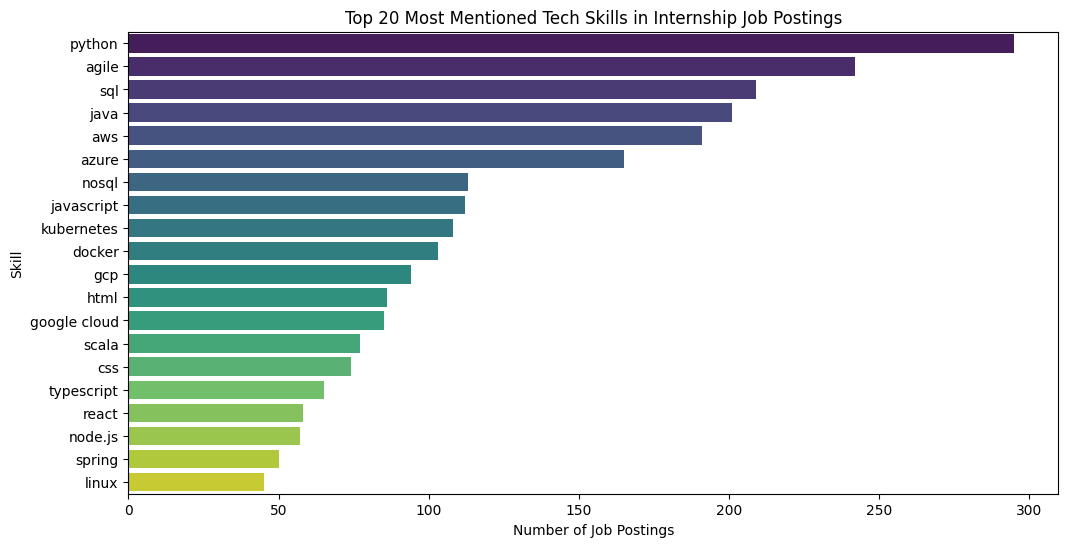

In [ ]:
# Count how many job descriptions contain each skill
internship_skill_counts = {skill.lower(): 0 for skill in tech_skills_keywords}

for description in internships["description"].dropna():
    matches = pattern.findall(description)  # Find all matches at once
    for match in set(matches):  # Count each skill only once per description
        internship_skill_counts[match.lower()] += 1  # Convert match to lowercase to avoid duplication issues

# Convert skill counts to a DataFrame
internship_skill_counts_df = pd.DataFrame(internship_skill_counts.items(), columns=["Skill", "Job Postings Count"])


# Sort and select top 20 most common skills
top_20_internship_skills_df = internship_skill_counts_df.sort_values(by="Job Postings Count", ascending=False).head(20)



# Display the table
# print(top_20_skills_df)
plt.figure(figsize=(12, 6))
sns.barplot(x="Job Postings Count", y="Skill", data=top_20_internship_skills_df, palette="viridis")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.title("Top 20 Most Mentioned Tech Skills in Internship Job Postings")
plt.show()

/var/folders/m7/kgr74ggx1rb3wd3t16w6wdm80000gn/T/ipykernel_26684/1415522036.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings Count", y="Skill", data=top_20_non_internship_skills_df, palette="viridis")


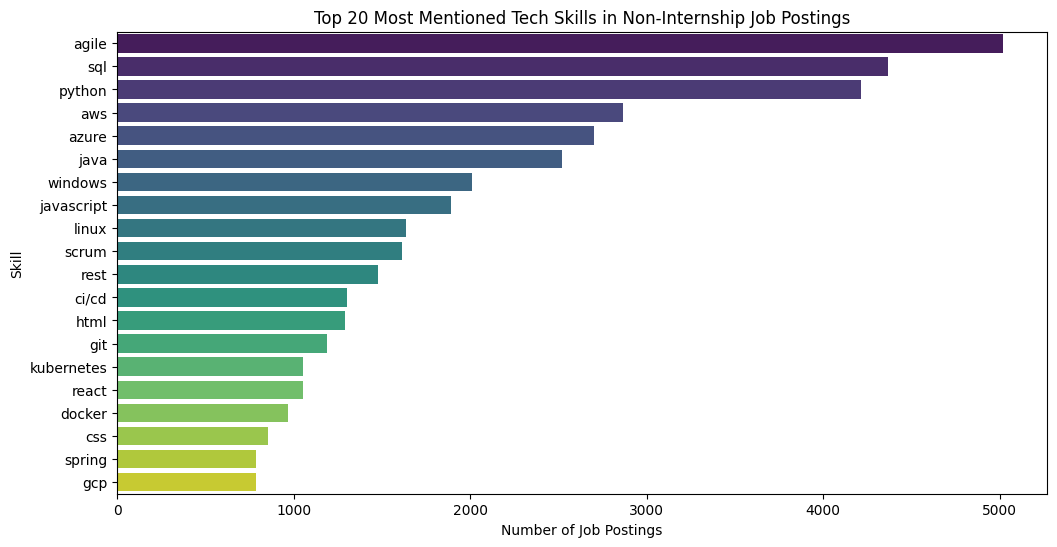

In [ ]:
# Count how many job descriptions contain each skill
non_internship_skill_counts = {skill.lower(): 0 for skill in tech_skills_keywords}

for description in non_internships["description"].dropna():
    matches = pattern.findall(description)  # Find all matches at once
    for match in set(matches):  # Count each skill only once per description
        non_internship_skill_counts[match.lower()] += 1  # Convert match to lowercase to avoid duplication issues

# Convert skill counts to a DataFrame
non_internship_skill_counts_df = pd.DataFrame(non_internship_skill_counts.items(), columns=["Skill", "Job Postings Count"])


# Sort and select top 20 most common skills
top_20_non_internship_skills_df = non_internship_skill_counts_df.sort_values(by="Job Postings Count", ascending=False).head(20)



# Display the table
# print(top_20_skills_df)
plt.figure(figsize=(12, 6))
sns.barplot(x="Job Postings Count", y="Skill", data=top_20_non_internship_skills_df, palette="viridis")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.title("Top 20 Most Mentioned Tech Skills in Non-Internship Job Postings")
plt.show()

In [ ]:
# Filter only remote-allowed tech job postings
remote_tech_postings = tech_postings[tech_postings['remote_allowed'] == 1]

In [77]:
# Filter only on-site tech job postings
onsite_tech_postings = tech_postings[tech_postings['remote_allowed'] != 1]

In [83]:
# Filter remote-allowed jobs from the tech_postings dataset
remote_tech_jobs_number = tech_postings['remote_allowed'].sum()

# Count total tech jobs
total_tech_jobs = len(tech_postings)

# Compute the percentage
remote_job_percentage = (remote_tech_jobs_number / total_tech_jobs) * 100

print(f"Percentage of remote-allowed tech jobs: {remote_job_percentage:.2f}%")
print(f"Percentage of onsite tech jobs: {100 - remote_job_percentage:.2f}%")

Percentage of remote-allowed tech jobs: 25.74%
Percentage of onsite tech jobs: 74.26%
